# Dive Prediction - Results

*Predicting Seabird Diving Behaviour from GPS data*

This notebook presents results of different algorithms for dive prediction based on a dataset of **74 foraging trips of seabirds** (*Sula Variegata*) with both GPS and Time Depth Recorder (TDR) tracking data. Data has been collected on **Ilha Pescadores, Peru** between 2009 and 2013.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def roc(data):
    # globally
    TP = []
    FP = []

    for tt in data.prediction.sort_values().unique():
        all_estim = 1* (data.prediction > tt)
        true_positive = np.mean(all_estim[data.dive == 1])
        true_negative = 1-np.mean(all_estim[data.dive == 0])
        TP.append(true_positive)
        FP.append(1-true_negative)
        
    return (np.array(FP), np.array(TP))

In [3]:
def outsampling(data, resolution):

    data_output = pd.DataFrame()
    for i in data.trip.unique():
        t = data[data.trip == i].copy()

        idx = [i%resolution == 0 for i in range(len(t))]

        traj = t.loc[idx, ('trip', 'datetime', 'lon', 'lat')]

        traj['dive'] = [np.max(t.dive[i:i+resolution]) for i in range(len(t)) if i%resolution==0]
        traj['prediction'] = [np.max(t.prediction[i:i+resolution]) for i in range(len(t)) if i%resolution==0]

        data_output = data_output.append(traj, ignore_index=True)

    return data_output

# Figure 1

In [4]:
LB_ftp_5s = pd.read_csv('./results/LB_ftp_5s.csv')
LB_ftp_15s = pd.read_csv('./results/LB_ftp_15s.csv')
LB_hmm_5s = pd.read_csv('./results/LB_hmm_5s.csv')
LB_hmm_15s = pd.read_csv('./results/LB_hmm_15s.csv')
LB_fcn_5s = pd.read_csv('./results/LB_fcn_lonlatcov_21_1_5s.csv')
LB_fcn_15s = pd.read_csv('./results/LB_fcn_lonlatcov_21_1_15s.csv')
LB_unet_5s = pd.read_csv('./results/LB_unet_matrixlonlatcov_20_20_5s.csv')
LB_unet_15s = pd.read_csv('./results/LB_unet_matrixlonlatcov_20_20_15s.csv')

SV_ftp_5s = pd.read_csv('./results/SV_ftp_5s.csv')
SV_ftp_15s = pd.read_csv('./results/SV_ftp_15s.csv')
SV_hmm_5s = pd.read_csv('./results/SV_hmm_5s.csv')
SV_hmm_15s = pd.read_csv('./results/SV_hmm_15s.csv')
SV_fcn_5s = pd.read_csv('./results/SV_fcn_lonlatcov_21_1_5s.csv')
SV_fcn_15s = pd.read_csv('./results/SV_fcn_lonlatcov_21_1_15s.csv')
SV_unet_5s = pd.read_csv('./results/SV_unet_matrixlonlatcov_20_20_5s.csv')
SV_unet_15s = pd.read_csv('./results/SV_unet_matrixlonlatcov_20_20_15s.csv')


LB_ftp_5s_roc = roc(LB_ftp_5s)
LB_ftp_15s_roc = roc(LB_ftp_15s)
LB_hmm_5s_roc = roc(LB_hmm_5s)
LB_hmm_15s_roc = roc(LB_hmm_15s)
LB_fcn_5s_roc = roc(LB_fcn_5s)
LB_fcn_15s_roc = roc(LB_fcn_15s)
LB_unet_5s_roc = roc(LB_unet_5s)
LB_unet_15s_roc = roc(LB_unet_15s)

SV_ftp_5s_roc = roc(SV_ftp_5s)
SV_ftp_15s_roc = roc(SV_ftp_15s)
SV_hmm_5s_roc = roc(SV_hmm_5s)
SV_hmm_15s_roc = roc(SV_hmm_15s)
SV_fcn_5s_roc = roc(SV_fcn_5s)
SV_fcn_15s_roc = roc(SV_fcn_15s)
SV_unet_5s_roc = roc(SV_unet_5s)
SV_unet_15s_roc = roc(SV_unet_15s)

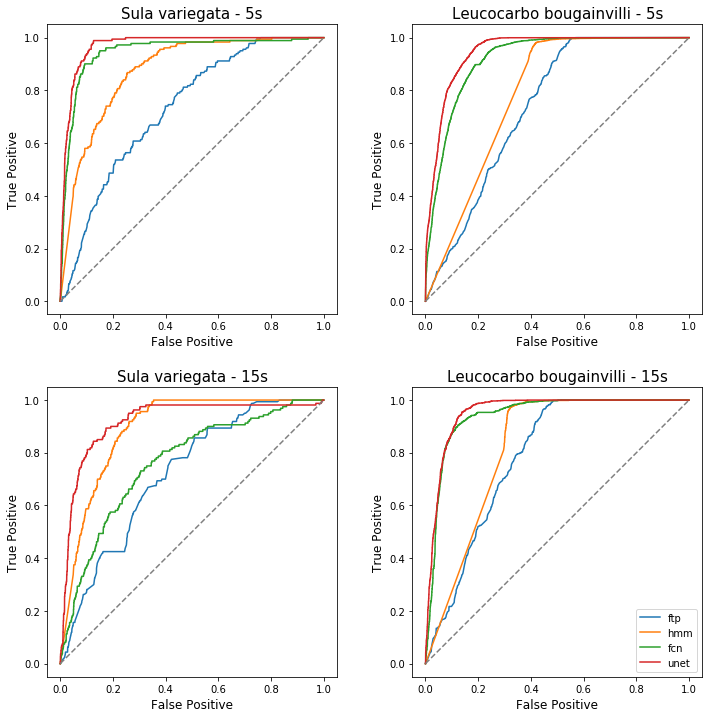

In [5]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
plt.subplots_adjust(hspace=0.25)

# plt.subplot(2,2,1, aspect = 'equal')
ax[0,0].plot(SV_ftp_5s_roc[0], SV_ftp_5s_roc[1], label = 'ftp')
ax[0,0].plot(SV_hmm_5s_roc[0], SV_hmm_5s_roc[1], label = 'hmm')
ax[0,0].plot(SV_fcn_5s_roc[0], SV_fcn_5s_roc[1], label = 'fcn')
ax[0,0].plot(SV_unet_5s_roc[0], SV_unet_5s_roc[1], label = 'unet')
ax[0,0].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')

ax[0,0].set_title('Sula variegata - 5s',fontsize= 15)
# plt.legend()

# plt.subplot(2,2,2, aspect = 'equal')
ax[0,1].plot(LB_ftp_5s_roc[0], LB_ftp_5s_roc[1], label = 'ftp')
ax[0,1].plot(LB_hmm_5s_roc[0], LB_hmm_5s_roc[1], label = 'hmm')
ax[0,1].plot(LB_fcn_5s_roc[0], LB_fcn_5s_roc[1], label = 'fcn')
ax[0,1].plot(LB_unet_5s_roc[0], LB_unet_5s_roc[1], label = 'unet')
ax[0,1].set_title('Leucocarbo bougainvilli - 5s',fontsize= 15)
ax[0,1].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
# plt.legend()

# plt.subplot(2,2,3, aspect = 'equal')
ax[1,0].plot(SV_ftp_15s_roc[0], SV_ftp_15s_roc[1], label = 'ftp')
ax[1,0].plot(SV_hmm_15s_roc[0], SV_hmm_15s_roc[1], label = 'hmm')
ax[1,0].plot(SV_fcn_15s_roc[0], SV_fcn_15s_roc[1], label = 'fcn')
ax[1,0].plot(SV_unet_15s_roc[0], SV_unet_15s_roc[1], label = 'unet')
ax[1,0].set_title('Sula variegata - 15s',fontsize= 15)
ax[1,0].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
# plt.legend()

# plt.subplot(2,2,4, aspect = 'equal')
ax[1,1].plot(LB_ftp_15s_roc[0], LB_ftp_15s_roc[1], label = 'ftp')
ax[1,1].plot(LB_hmm_15s_roc[0], LB_hmm_15s_roc[1], label = 'hmm')
ax[1,1].plot(LB_fcn_15s_roc[0], LB_fcn_15s_roc[1], label = 'fcn')
ax[1,1].plot(LB_unet_15s_roc[0], LB_unet_15s_roc[1], label = 'unet')
ax[1,1].set_title('Leucocarbo bougainvilli - 15s',fontsize= 15)
ax[1,1].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
ax[1,1].legend()

for a in ax.flat:
    a.set_xlabel('False Positive', fontsize= 12)
    a.set_ylabel('True Positive', fontsize= 12)
    
    a.set_aspect('equal')

# Figure 2

In [22]:
fcn_lonlat = pd.read_csv('./results/SV_fcn_lonlat_21_1_5s.csv')
fcn_lonlatcov = pd.read_csv('./results/SV_fcn_lonlatcov_21_1_5s.csv')
unet_lonlat = pd.read_csv('./results/SV_unet_lonlat_20_20_5s.csv')
unet_lonlatcov = pd.read_csv('./results/SV_unet_lonlatcov_20_20_5s.csv')
unet_matrix = pd.read_csv('./results/SV_unet_matrix_20_20_5s.csv')
unet_matrixcov = pd.read_csv('./results/SV_unet_matrixlonlatcov_20_20_5s.csv')


fcn_lonlat_roc = roc(fcn_lonlat)
fcn_lonlatcov_roc = roc(fcn_lonlatcov)
unet_lonlat_roc = roc(unet_lonlat)
unet_lonlatcov_roc = roc(unet_lonlatcov)
unet_matrix_roc = roc(unet_matrix)
unet_matrixcov_roc = roc(unet_matrixcov)

fcn_lonlat_LOSS = pd.read_csv('./results/SV_fcn_lonlat_21_1_5s_LOSS.csv')
fcn_lonlatcov_LOSS = pd.read_csv('./results/SV_fcn_lonlatcov_21_1_5s_LOSS.csv')
unet_lonlat_LOSS = pd.read_csv('./results/SV_unet_lonlat_20_20_5s_LOSS.csv')
unet_lonlatcov_LOSS = pd.read_csv('./results/SV_unet_lonlatcov_20_20_5s_LOSS.csv')
unet_matrix_LOSS = pd.read_csv('./results/SV_unet_matrix_20_20_5s_LOSS.csv')
unet_matrixcov_LOSS = pd.read_csv('./results/SV_unet_matrixlonlatcov_20_20_5s_LOSS.csv')

(0, 2.5)

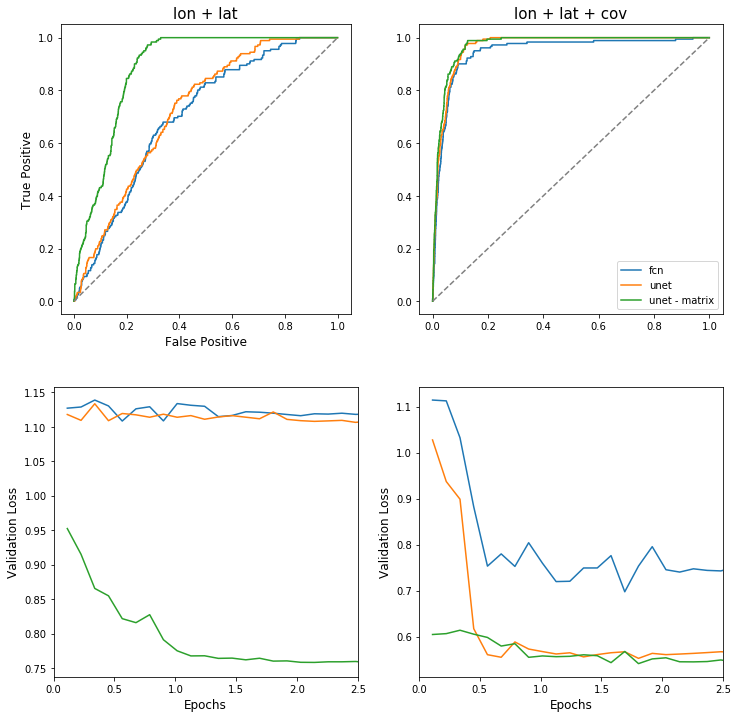

In [48]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
plt.subplots_adjust(hspace=0.25)

# plt.subplot(2,2,1, aspect = 'equal')
ax[0,0].plot(fcn_lonlat_roc[0], fcn_lonlat_roc[1], label = 'fcn')
ax[0,0].plot(unet_lonlat_roc[0], unet_lonlat_roc[1], label = 'unet')
ax[0,0].plot(unet_matrix_roc[0], unet_matrix_roc[1], label = 'unet - matrix')
ax[0,0].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
ax[0,0].set_title('lon + lat',fontsize= 15)
ax[0,0].set_xlabel('False Positive', fontsize= 12)
ax[0,0].set_ylabel('True Positive', fontsize= 12)
ax[0,0].set_aspect('equal')

# plt.subplot(2,2,2, aspect = 'equal')
ax[0,1].plot(fcn_lonlatcov_roc[0], fcn_lonlatcov_roc[1], label = 'fcn')
ax[0,1].plot(unet_lonlatcov_roc[0], unet_lonlatcov_roc[1], label = 'unet')
ax[0,1].plot(unet_matrixcov_roc[0], unet_matrixcov_roc[1], label = 'unet - matrix')
ax[0,1].set_title('lon + lat + cov',fontsize= 15)
ax[0,1].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
ax[0,1].legend()
 
ax[1,0].plot(np.arange(1,len(fcn_lonlat_LOSS)+1)*512*16/72638, fcn_lonlat_LOSS.step_loss_validation)
ax[1,0].plot(np.arange(1,len(unet_lonlat_LOSS)+1)*512*16/72638, unet_lonlat_LOSS.step_loss_validation)
ax[1,0].plot(np.arange(1,len(unet_matrix_LOSS)+1)*512*16/72638, unet_matrix_LOSS.step_loss_validation)
ax[1,0].set_xlabel('Epochs', fontsize= 12)
ax[1,0].set_ylabel('Validation Loss', fontsize= 12)
ax[1,0].set_xlim([0, 2.5])

ax[1,1].plot(np.arange(1,len(fcn_lonlatcov_LOSS)+1)*512*16/72638, fcn_lonlatcov_LOSS.step_loss_validation)
ax[1,1].plot(np.arange(1,len(unet_lonlatcov_LOSS)+1)*512*16/72638, unet_lonlatcov_LOSS.step_loss_validation)
ax[1,1].plot(np.arange(1,len(unet_matrixcov_LOSS)+1)*512*16/72638, unet_matrixcov_LOSS.step_loss_validation)
ax[1,1].set_xlabel('Epochs', fontsize= 12)
ax[1,1].set_ylabel('Validation Loss', fontsize= 12)
ax[1,1].set_xlim([0, 2.5])


In [47]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# Figure 3

In [16]:
unet_lonlatcov_LOSS

,step_loss_train,step_loss_validation
0,1.012796,1.027396
1,0.908160,0.936974
2,0.841306,0.898584
3,0.503626,0.617108
4,0.489128,0.560589
5,0.471598,0.555006
6,0.458678,0.588298
7,0.455921,0.572889
8,0.444956,0.567391
9,0.431045,0.562146
